## Team ID = PTID-CDS-JAN 22 -1273A

### Project ID = PM-PR-0017-Europe Telecom Churn Rate ML

##### Problem Statement = Telecom Churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('chun_model.csv')
df.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
Columns=['State','Account Length','Area Code','Phone','International Plan','VMail Plan','VMail Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins','Night Calls','Night Charge','International Mins','International calls','International Charge','CustServ Calls','Churn']

In [4]:
df.columns=Columns
df.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
print(df.shape)

(4617, 21)


In [6]:
print('features of dataset')
df.columns

features of dataset


Index(['State', 'Account Length', 'Area Code', 'Phone', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International calls',
       'International Charge', 'CustServ Calls', 'Churn'],
      dtype='object')

### Features representation

##### STATE:     51 Unique States name

##### Account Length: Length of The Account

##### Area Code: Code Number of Area having some States

##### International Plan: Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

##### Voice Mail Plan: Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

##### Number vmail messages: Number of Voice Mail Messages ranging from 0 to 50

##### Total day minutes: Total Number of Minutes Spent in Morning

##### Total day calls: Total Number of Calls made in Morning.

##### Total day charge: Total Charge to the Customers in Morning.

##### Total eve minutes: Total Number of Minutes Spent in Evening

##### Total eve calls: Total Number of Calls made r in Evening.

##### Total eve charge: Total Charge to the Customers in Morning.

##### Total night minutes: Total Number of Minutes Spent in the Night.

##### Total night calls: Total Number of Calls made in Night.

##### Total night charge: Total Charge to the Customers in Night.

##### Customer service calls Number of customer service calls made by customer

##### Churn Customer Churn, True means churned customer, False means retained customer

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   int64  
 2   Area Code             4617 non-null   int64  
 3   Phone                 4617 non-null   object 
 4   International Plan    4617 non-null   object 
 5   VMail Plan            4617 non-null   object 
 6   VMail Message         4617 non-null   int64  
 7   Day Mins              4617 non-null   float64
 8   Day Calls             4617 non-null   int64  
 9   Day Charge            4617 non-null   float64
 10  Eve Mins              4617 non-null   float64
 11  Eve Calls             4617 non-null   int64  
 12  Eve Charge            4617 non-null   float64
 13  Night Mins            4617 non-null   float64
 14  Night Calls           4617 non-null   int64  
 15  Night Charge         

In [8]:
df.dtypes

State                    object
Account Length            int64
Area Code                 int64
Phone                    object
International Plan       object
VMail Plan               object
VMail Message             int64
Day Mins                float64
Day Calls                 int64
Day Charge              float64
Eve Mins                float64
Eve Calls                 int64
Eve Charge              float64
Night Mins              float64
Night Calls               int64
Night Charge            float64
International Mins      float64
International calls       int64
International Charge    float64
CustServ Calls            int64
Churn                    object
dtype: object

##### The telecom churn dataset having different types of datatypes.

In [9]:
df.nunique()

State                     51
Account Length           218
Area Code                  3
Phone                   4617
International Plan         2
VMail Plan                 2
VMail Message             47
Day Mins                1901
Day Calls                123
Day Charge              1901
Eve Mins                1833
Eve Calls                125
Eve Charge              1621
Night Mins              1813
Night Calls              130
Night Charge            1012
International Mins       168
International calls       21
International Charge     168
CustServ Calls            10
Churn                      2
dtype: int64

##### The above function represents the howmany unique number of rows present in the dataset

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,4617,51,WV,149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account Length,4617.0,NaN,NaN,NaN,100.645224,39.597194,1.0,74.0,100.0,127.0,243.0
Area Code,4617.0,NaN,NaN,NaN,437.04635,42.288212,408.0,408.0,415.0,510.0,510.0
Phone,4617,4617,382-4657,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
International Plan,4617,2,no,4171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMail Plan,4617,2,no,3381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VMail Message,4617.0,NaN,NaN,NaN,7.849903,13.592333,0.0,0.0,0.0,17.0,51.0
Day Mins,4617.0,NaN,NaN,NaN,180.447152,53.98354,0.0,143.7,180.0,216.8,351.5
Day Calls,4617.0,NaN,NaN,NaN,100.054364,19.883027,0.0,87.0,100.0,113.0,165.0
Day Charge,4617.0,NaN,NaN,NaN,30.676576,9.177145,0.0,24.43,30.6,36.86,59.76


##### The above function represents the mean,standard deviation,maximum and minimum values of the dataset.

In [11]:
print(df.isnull().sum())
print('')
print('No of duplicate values:')
print(df.duplicated().sum())

State                   0
Account Length          0
Area Code               0
Phone                   0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

No of duplicate values:
0


##### In this dataset do not having missing  values.

In [12]:
df.isna().sum()

State                   0
Account Length          0
Area Code               0
Phone                   0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

##### In this dataset do not having  Nan values.

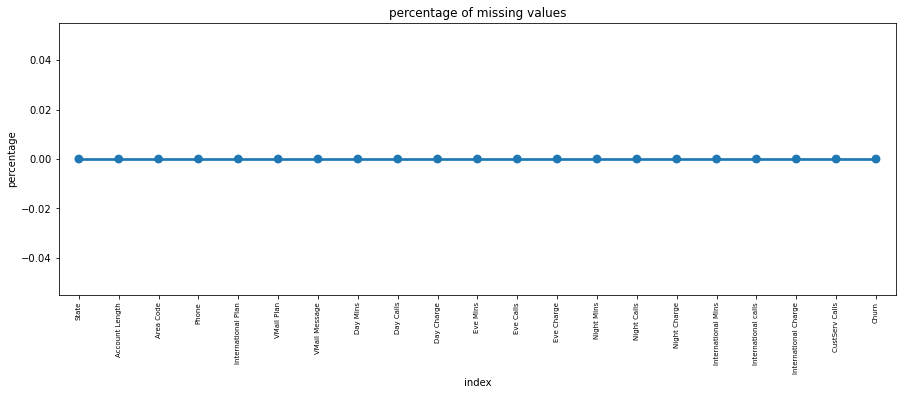

In [13]:
missing=pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(15,5))
sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title('percentage of missing values')
plt.ylabel('percentage')
plt.show()

#### 1. Above graph represents the percentage of missing values in the data set. We can observe in the entire dataset having zero percentage of null values.

In [14]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [15]:
df.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


##### The above function works on to showing the all columns in the dataset.


##### As of now There are 3333 rows and 20 columns in above dataset.

##### out of which there are 1 boolean data type i.e churn

##### 8 float data type,

##### 8integer data type,

##### 3 object data type i.e catagarical value are there.

##### There are no missing value present so no need to do the missing value imputation,

##### And also there are no duplicate value present

## Explotarory Data Analysis of Telecom Churn

In [16]:
df['Churn'].value_counts()

 False.    3961
 True.      656
Name: Churn, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
ln=LabelEncoder()
df['Churn']=ln.fit_transform(df['Churn'])
df['International Plan']=ln.fit_transform(df['International Plan'])
df['VMail Plan']=ln.fit_transform(df['VMail Plan'])


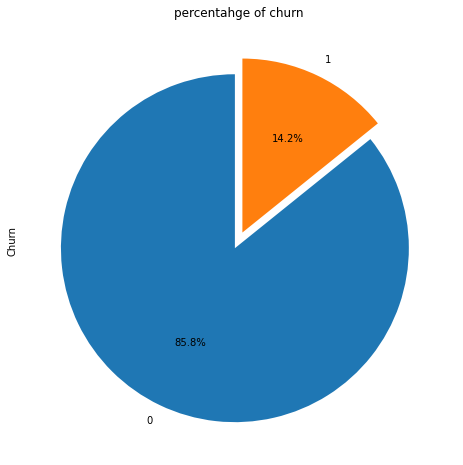

In [18]:
df['Churn'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',startangle=90,figsize=(8,8))
plt.title('percentahge of churn')
plt.show()

#### * Above graph represents the percentage of target column.Almost 85% of customers are no churn and 15% of customers are Churn customers.

<AxesSubplot:xlabel='Churn', ylabel='count'>

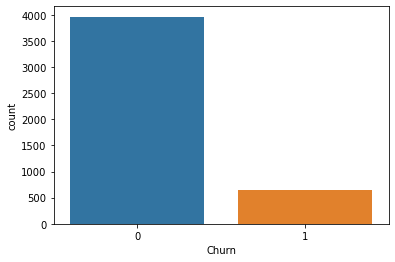

In [19]:
sns.countplot(x='Churn',data=df)


###  > Analysing state column

In [20]:
df['State'].nunique()

51

<AxesSubplot:xlabel='State', ylabel='count'>

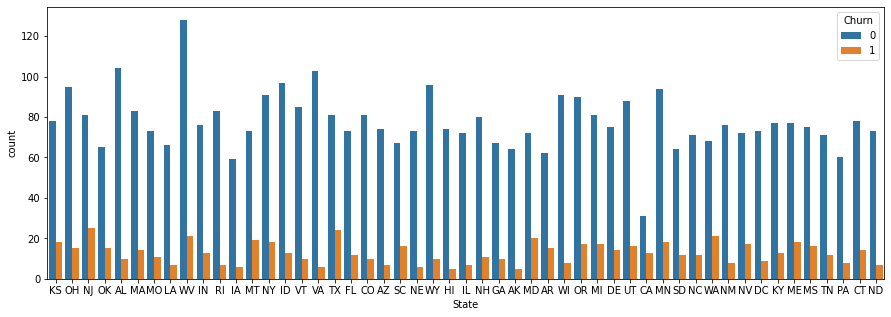

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(x='State',hue='Churn',data=df)

##### Above graph represents the telecom churn level in different states in europe. From above graph we can observe the all the states having less no of churn.

In [22]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

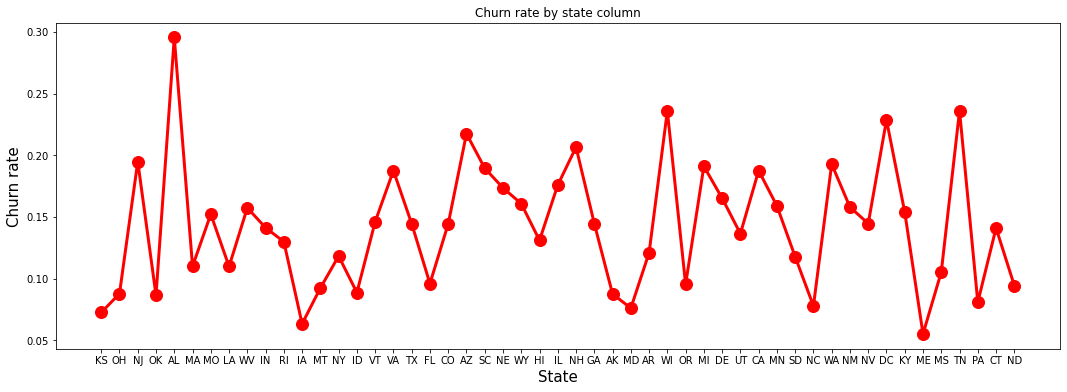

In [23]:
s1=df['State'].unique()
s2=df.groupby(['State'])['Churn'].mean()
plt.figure(figsize=(18,6))
plt.plot(s1,s2,marker='o',color='r',linewidth='3',markersize=12)
plt.xlabel('State',fontsize=15)
plt.ylabel('Churn rate',fontsize=15)
plt.title('Churn rate by state column')
plt.show()

##### Above figure shown the results like state and churn rate.We can observe the series of churn rate one of state having high churn with respect to output column.

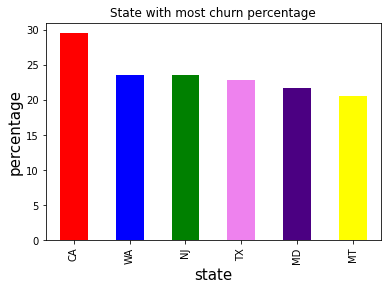

In [24]:
color=plt.cm.copper(np.linspace(0,0.5,2))
((df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending=False).head(6).plot.bar(color=['red','blue','green','violet','indigo','yellow'])
plt.xlabel('state',fontsize=15)
plt.ylabel('percentage',fontsize=15)
plt.title('State with most churn percentage')
plt.show()


##### The above figure represents the highest percentage of churn of top six states.

In [25]:
# State Vs Churn percentage
df1=pd.crosstab(df['State'],df['Churn'])
df1['percentage of churn']=df1.apply(lambda x:x[1]*100/(x[0]+x[1]),axis=1)
df1.groupby(['State'])['percentage of churn'].mean().sort_values(ascending=False).head(6)

State
CA    29.545455
WA    23.595506
NJ    23.584906
TX    22.857143
MD    21.739130
MT    20.652174
Name: percentage of churn, dtype: float64

##### In the above dataset CA,WA,NJ,TX,MD,MT States having more than 20 percent churn rate. The reason behind it is the more number of customer calls from these states means it may be some network issues in that particular states.

In [26]:
df.groupby(['State'])['CustServ Calls'].mean().sort_values(ascending=False).head(6)

State
GA    1.818182
AR    1.792208
VT    1.778947
MO    1.750000
NJ    1.745283
MD    1.728261
Name: CustServ Calls, dtype: float64

### > Analysing 'Area code' Column

In [27]:
# percentage of churn by area code
df_area=pd.crosstab(df['Area Code'],df['Churn'])
df_area['percentage of churn']=df_area.apply(lambda x:x[1]*100/(x[0]+x[1]),axis=1)
df_area


Churn,0,1,percentage of churn
Area Code,,,
408,996,165,14.211886
415,1981,318,13.832101
510,984,173,14.952463


<AxesSubplot:xlabel='Area Code', ylabel='count'>

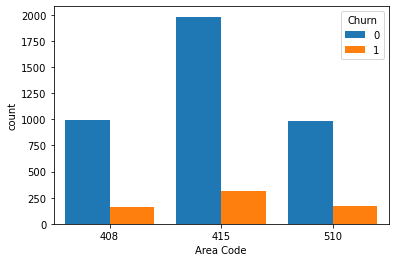

In [28]:
sns.countplot(x='Area Code',hue='Churn',data=df,saturation=1)

##### The above figure represents relation between the no of churn customers by area code.But we say the area code not impact on output column

### > Analysing the 'Account Length' 

<AxesSubplot:xlabel='Account Length', ylabel='Density'>

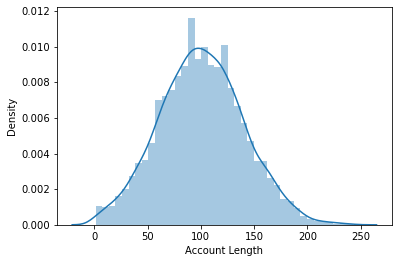

In [29]:
sns.distplot(df['Account Length'])

In [30]:
churn_df=df[df['Churn']==1]
not_churn_df=df[df['Churn']==0]

<AxesSubplot:xlabel='Account Length', ylabel='Density'>

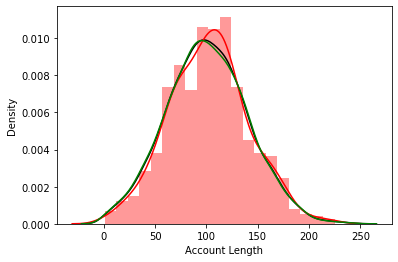

In [31]:
sns.distplot(df['Account Length'],color='black',hist=False,label='All')
sns.distplot(churn_df['Account Length'],color='red',hist=True,label='churn')
sns.distplot(not_churn_df['Account Length'],color='green',hist=False,label='not churn')


#### After analyzing various aspects of the "account length" column we didn't found any useful relation to churn. so we aren't able to build any connection to the churn as of now. let's see what other features say about the churn.

### > Analysing 'International Plan'

In [32]:
df['International Plan'].value_counts()

0    4171
1     446
Name: International Plan, dtype: int64

In [33]:
df['International Plan'].unique()

array([0, 1])

<AxesSubplot:xlabel='International Plan', ylabel='count'>

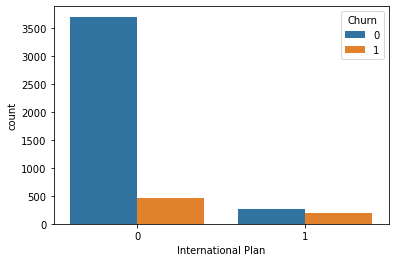

In [34]:
sns.countplot(x='International Plan',hue='Churn',data=df)

In [35]:
# Calculate the international plan Vs churn percentage
df_international=pd.crosstab(df['International Plan'],df['Churn'])
df_international['Percentage of churn']=df_international.apply(lambda x :x[1]*100/(x[0]+x[1]),axis=1)
df_international

Churn,0,1,Percentage of churn
International Plan,,,
0,3701,470,11.268281
1,260,186,41.704036


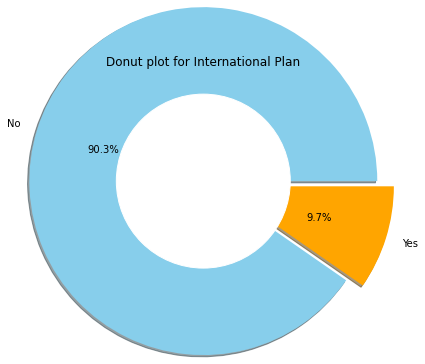

In [36]:
# To get the donut plot to analyse the international plan
data=df['International Plan'].value_counts()
explode=(0,0.2)
plt.pie(data,explode=explode,autopct='%1.1f%%',shadow=True,radius=2.0,labels=['No','Yes'],colors=['skyblue','orange'])
circle=plt.Circle((0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut plot for International Plan')
plt.show()

##### From the above data we get

1. There are 3010 customers who dont have a international plan.

2. There are 323 customers who have a international plan.

3. Among those who have a international plan 42.4 % people churn.

4. Whereas among those who dont have a international plan only 11.4 % people churn.

5. So basically the people who bought International plans are churning in big numbers.

6. Probably because of connectivity issues or high call charge.

###  > Analysing Voice Mail Column

In [37]:
df_voice=pd.crosstab(df['VMail Plan'],df['Churn'])
df_voice['Percentage of churn']=df_voice.apply(lambda x:x[1]*100/(x[0]+x[1]),axis=1)
df_voice

Churn,0,1,Percentage of churn
VMail Plan,,,
0,2822,559,16.533570
1,1139,97,7.847896


<AxesSubplot:xlabel='VMail Plan', ylabel='count'>

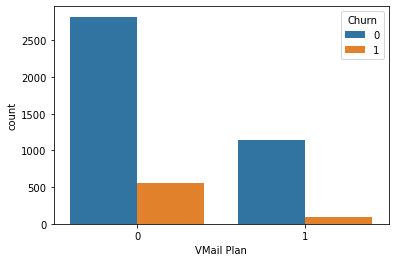

In [38]:
sns.countplot(x='VMail Plan',hue='Churn',data=df)

##### From Above figure we can say that 
1. There are 2822 customers who don't have VMail Plan
2. There are 1139 customers who have Vmail Plan
3. Amomg those who do not have VMail Plan  16.53% of customers churn
4. Among those who have VMail Plan 7.84% of customers Churn

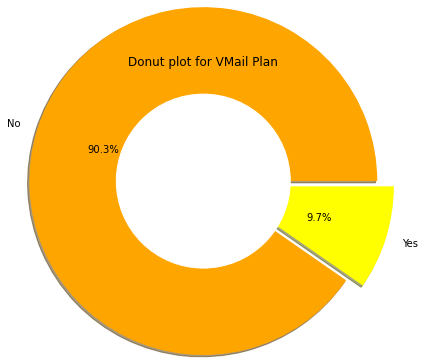

In [39]:
# to get donut plot analyse the VMail Plan
data_vmail=df['VMail Plan'].value_counts()
explode=(0,0.2)
plt.pie(data,explode=explode,autopct='%1.1f%%',shadow=True,radius=2.0,labels=['No','Yes'],colors=['orange','yellow'])
circle=plt.Circle((0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut plot for VMail Plan')
plt.show()

In [40]:
df['VMail Message'].value_counts()

0     3381
31      80
29      64
28      62
33      61
24      57
27      57
26      55
30      54
32      52
25      49
23      48
22      45
36      45
37      42
39      40
35      40
21      40
34      39
38      37
20      30
19      26
40      26
41      21
42      19
17      18
16      16
18      14
43      13
15      12
12      10
45      10
14       9
46       8
44       7
10       4
47       4
13       4
48       3
49       3
9        2
50       2
6        2
8        2
11       2
4        1
51       1
Name: VMail Message, dtype: int64

<AxesSubplot:xlabel='VMail Message', ylabel='Density'>

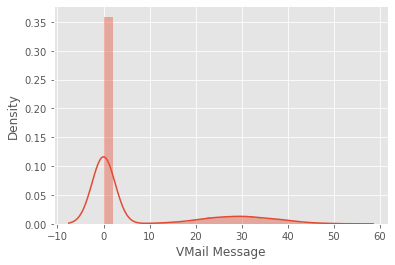

In [41]:

plt.style.use('ggplot')
sns.distplot(df['VMail Message'])

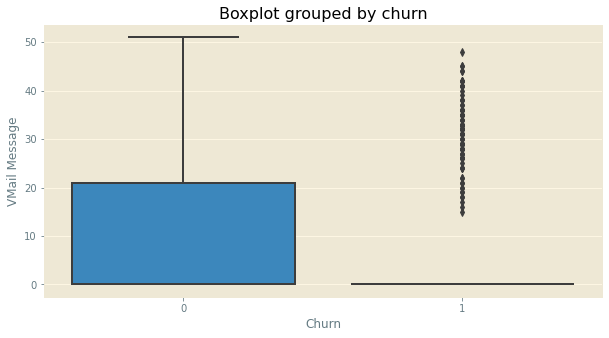

In [42]:
fig=plt.figure(figsize=(10,5))
plt.style.use('Solarize_Light2')
sns.boxplot(x='Churn',y='VMail Message',data=df)
plt.title('Boxplot grouped by churn')
plt.show()


####  After analyzing the above voice mail feature data we get an insight that when there are more than 20 voice-mail messages then there is a churn .For that, we need to improve the voice mail quality.

###  > Analysing 'Customer Service calls'

In [43]:
df['CustServ Calls'].value_counts()


1    1651
2    1031
0     951
3     616
4     234
5      89
6      28
7      13
9       2
8       2
Name: CustServ Calls, dtype: int64

In [44]:
#df.groupby(['CustServ Calls'])['Churn'].mean()
df_cusser=pd.crosstab(df['CustServ Calls'],df['Churn'])
df_cusser['percentage of churn']=df_cusser.apply(lambda x : x[1]*100/(x[0]+x[1]),axis=1)
df_cusser

Churn,0,1,percentage of churn
CustServ Calls,,,
0,835,116,12.197687
1,1475,176,10.660206
2,919,112,10.863240
3,551,65,10.551948
4,130,104,44.444444
5,34,55,61.797753
6,10,18,64.285714
7,6,7,53.846154
8,1,1,50.000000


<AxesSubplot:xlabel='CustServ Calls', ylabel='count'>

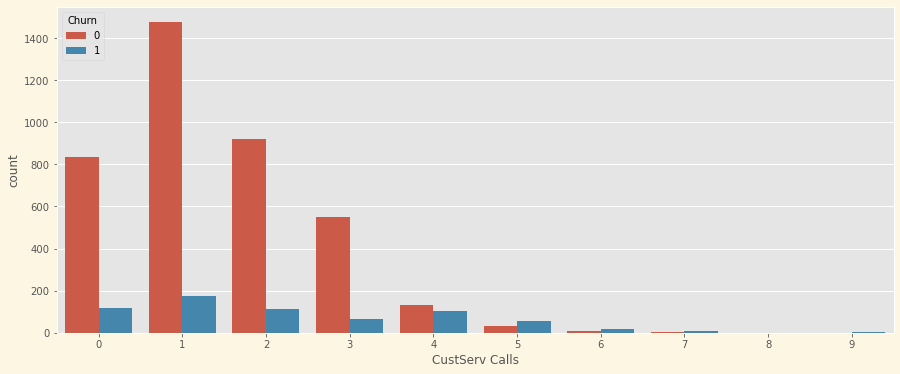

In [45]:
plt.figure(figsize=(15,6))
plt.style.use('ggplot')
sns.countplot(x='CustServ Calls',hue='Churn',data=df)

#### The above graph represents the less number of customer service calls having low percentage of churn and high number of customer service calls having high percentage of churn. The more number of customers ready to churn. So then we provide good network.

## Analysing All Mins,ALL Calls,All Charge

In [46]:
df.groupby(['Churn'])['Day Mins'].mean()

Churn
0    176.000252
1    207.298018
Name: Day Mins, dtype: float64

In [47]:
df.groupby(['Churn'])['Day Calls'].mean()

Churn
0     99.922747
1    100.849085
Name: Day Calls, dtype: float64

In [48]:
df.groupby(['Churn'])['Day Charge'].mean()

Churn
0    29.920624
1    35.241098
Name: Day Charge, dtype: float64

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

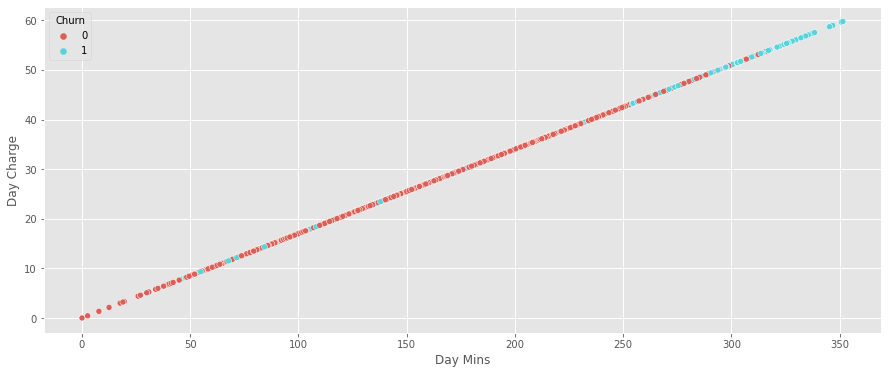

In [49]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Day Mins',y='Day Charge',hue='Churn',data=df,palette='hls')

In [50]:
df.groupby(['Churn'])['Eve Mins'].mean()

Churn
0    198.638425
1    211.241311
Name: Eve Mins, dtype: float64

In [51]:
df.groupby(['Churn'])['Eve Charge'].mean()

Churn
0    16.884509
1    17.955671
Name: Eve Charge, dtype: float64

<AxesSubplot:xlabel='Eve Mins', ylabel='Eve Charge'>

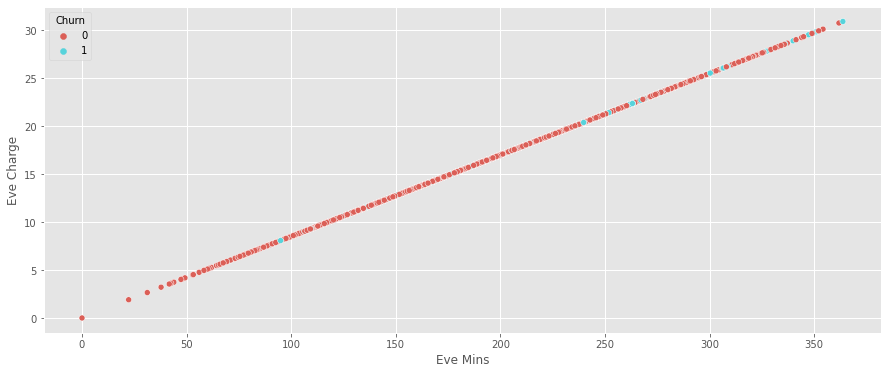

In [52]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Eve Mins',y='Eve Charge',hue='Churn',data=df,color='red',palette='hls')

In [53]:
df.groupby(['Churn'])['Night Mins'].mean()

Churn
0    199.734158
1    205.996494
Name: Night Mins, dtype: float64

In [54]:
df.groupby(['Churn'])['Night Charge'].mean()

Churn
0    8.988147
1    9.269939
Name: Night Charge, dtype: float64

In [55]:
df.groupby(['Churn'])['Night Calls'].mean()

Churn
0    99.998233
1    99.617378
Name: Night Calls, dtype: float64

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

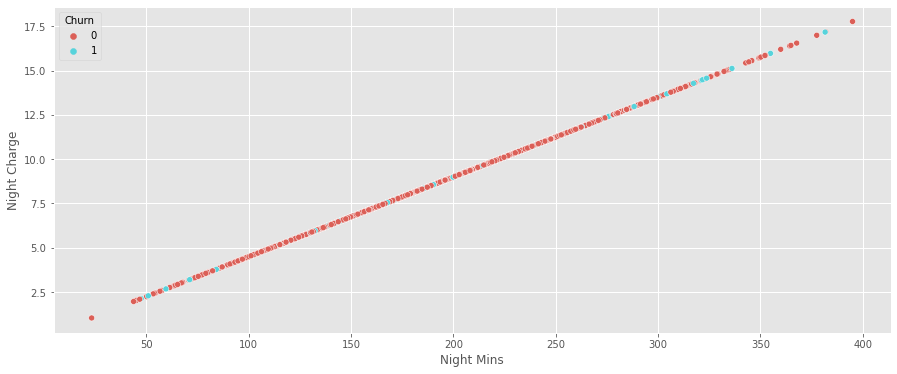

In [56]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Night Mins',y='Night Charge',hue='Churn',data=df,color='red',palette='hls')

In [57]:
df.groupby(['Churn'])['International Mins'].mean()

Churn
0    10.206665
1    10.717835
Name: International Mins, dtype: float64

In [58]:
df.groupby(['Churn'])['International calls'].mean()

Churn
0    4.479677
1    4.157012
Name: International calls, dtype: float64

In [59]:
df.groupby(['Churn'])['International Charge'].mean()

Churn
0    2.756319
1    2.894314
Name: International Charge, dtype: float64

<AxesSubplot:xlabel='International Mins', ylabel='International Charge'>

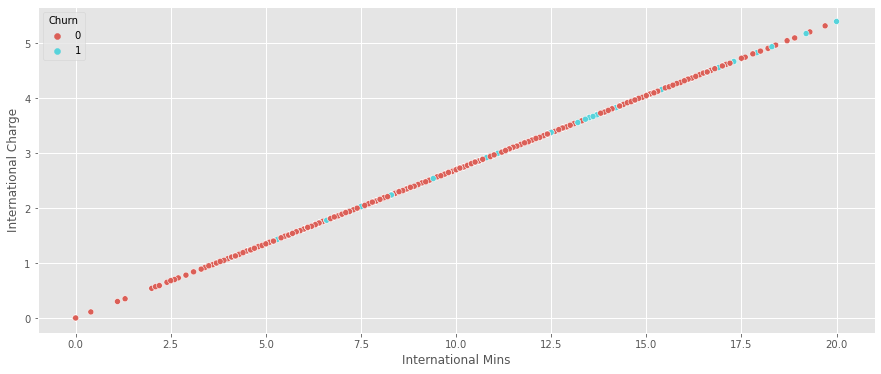

In [60]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='International Mins',y='International Charge',hue='Churn',data=df,color='red',palette='hls')

In [61]:
day_charge=df['Day Charge'].mean()/df['Day Mins'].mean()
eve_charge=df['Eve Charge'].mean()/df['Eve Mins'].mean()
night_charge=df['Night Charge'].mean()/df['Night Mins'].mean()
International_charge=df['International Charge'].mean()/df['International Mins'].mean()

In [62]:
print('Day charge :',day_charge)
print('Eve Charge :',eve_charge)
print('Night Charge :',night_charge)
print('International :',International_charge)

Day charge : 0.1700031027775564
Eve Charge : 0.08500115249814362
Night Charge : 0.04500053817379559
International : 0.27005025337392835


<AxesSubplot:>

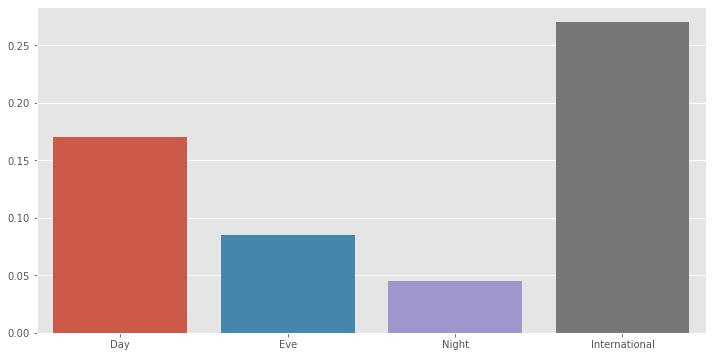

In [63]:
plt.figure(figsize=(12,6))
sns.barplot(x=['Day','Eve','Night','International'],y=[day_charge,eve_charge,night_charge,International_charge],data=df)

##### From the above graph we can observe that compare with day/eve/night charges the international charges are very high. So it can cause to  International customers to change the network. So we can minimise the charges on international customers.

## Univariate Analysis

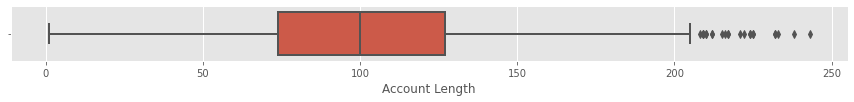

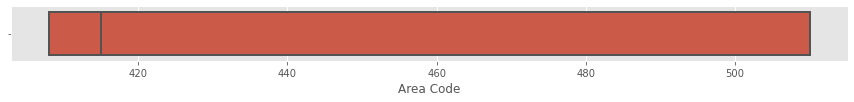

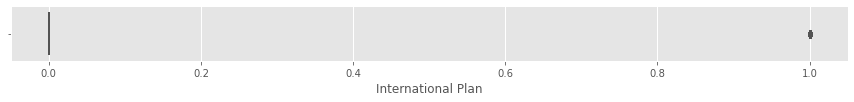

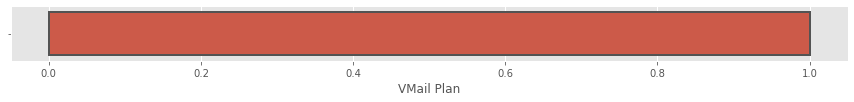

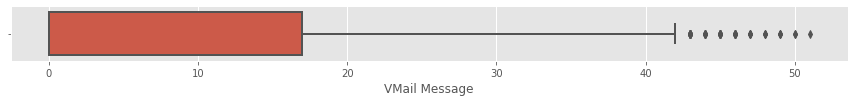

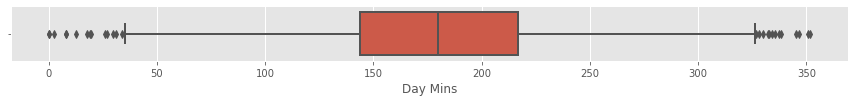

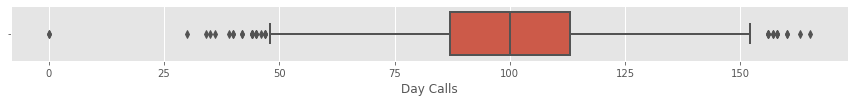

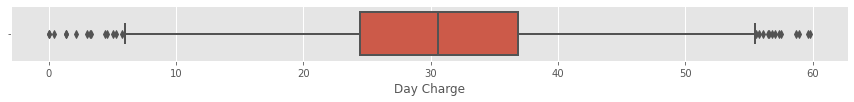

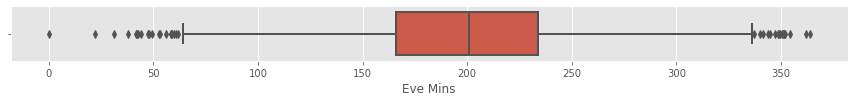

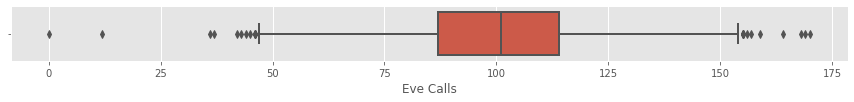

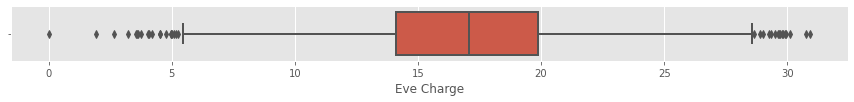

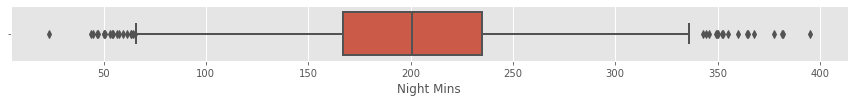

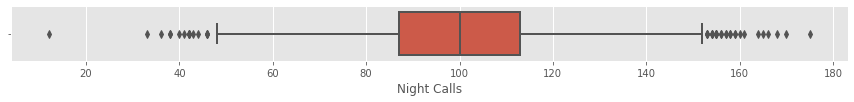

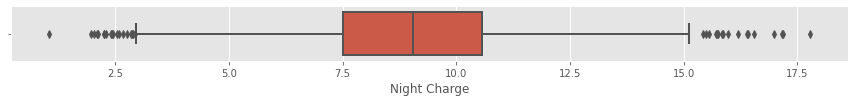

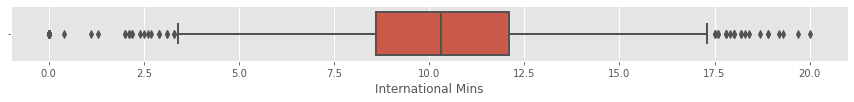

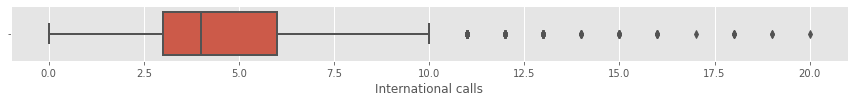

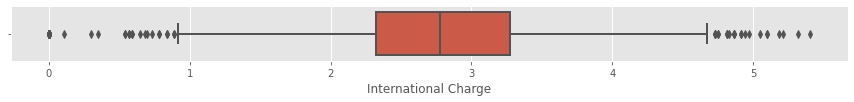

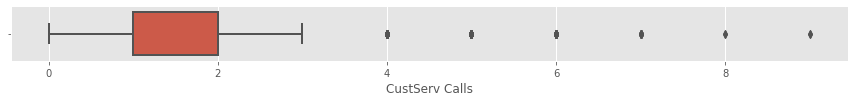

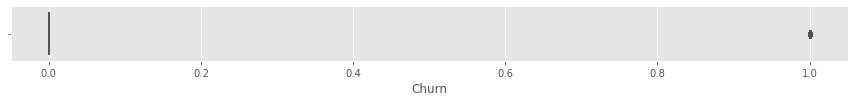

In [64]:
# Boxplot of all numerical columns in the dataset
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
    plt.figure(figsize=(15,1))
    sns.boxplot(x=column,data=df1)
    
plt.show()    

<Figure size 1224x72 with 0 Axes>

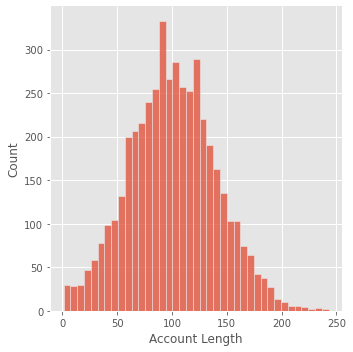

<Figure size 1224x72 with 0 Axes>

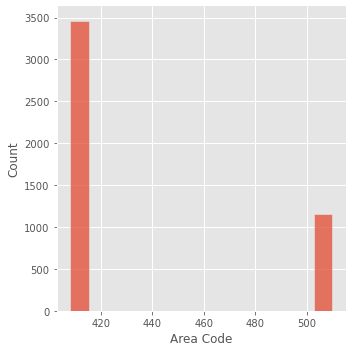

<Figure size 1224x72 with 0 Axes>

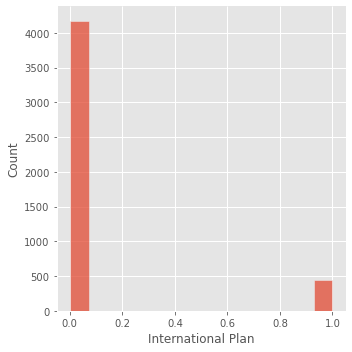

<Figure size 1224x72 with 0 Axes>

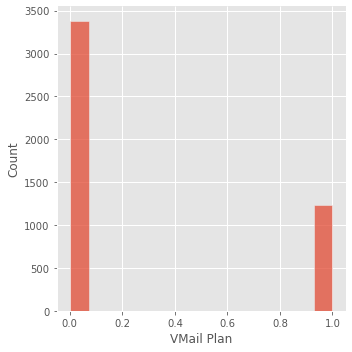

<Figure size 1224x72 with 0 Axes>

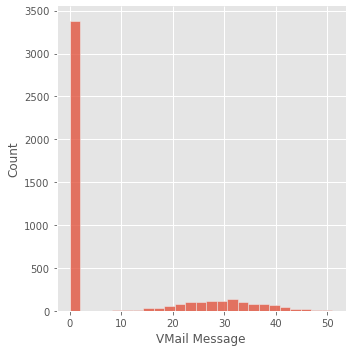

<Figure size 1224x72 with 0 Axes>

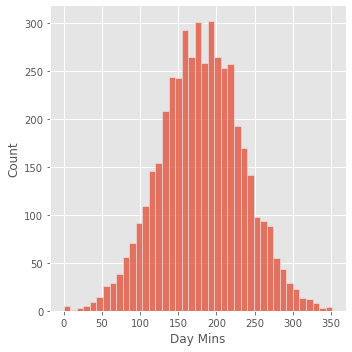

<Figure size 1224x72 with 0 Axes>

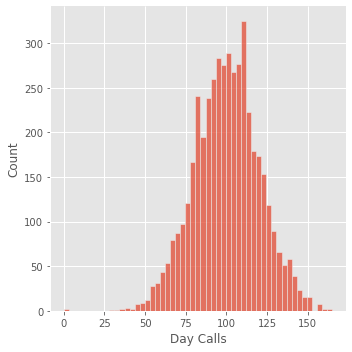

<Figure size 1224x72 with 0 Axes>

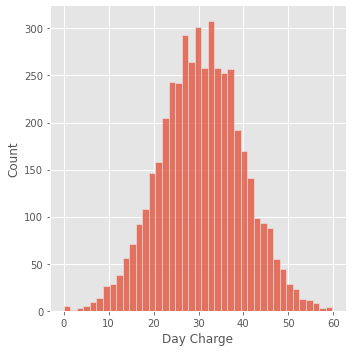

<Figure size 1224x72 with 0 Axes>

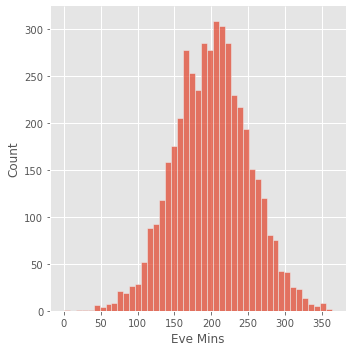

<Figure size 1224x72 with 0 Axes>

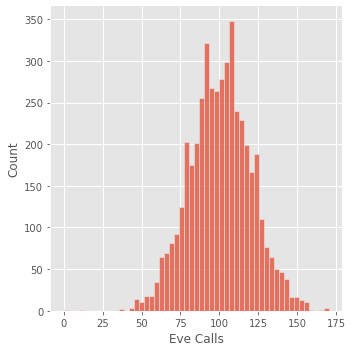

<Figure size 1224x72 with 0 Axes>

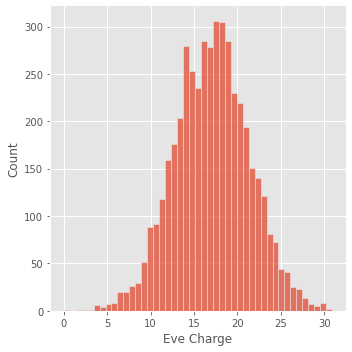

<Figure size 1224x72 with 0 Axes>

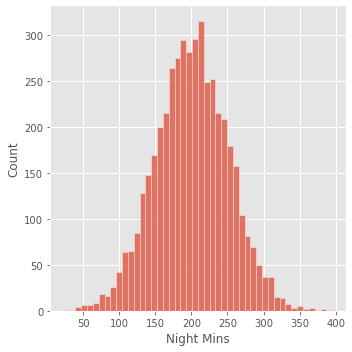

<Figure size 1224x72 with 0 Axes>

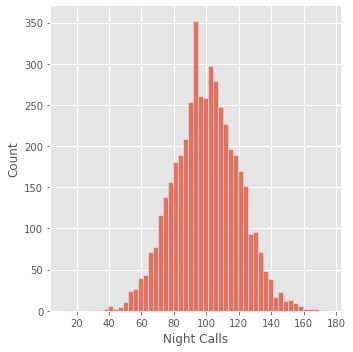

<Figure size 1224x72 with 0 Axes>

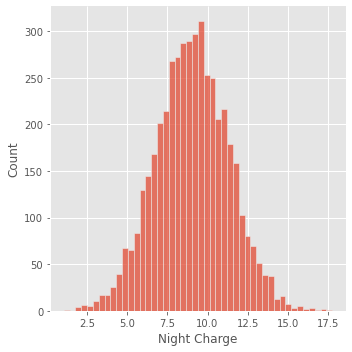

<Figure size 1224x72 with 0 Axes>

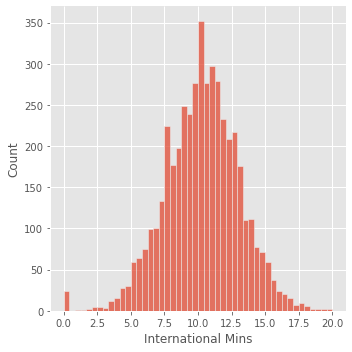

<Figure size 1224x72 with 0 Axes>

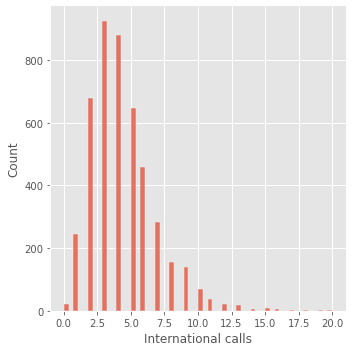

<Figure size 1224x72 with 0 Axes>

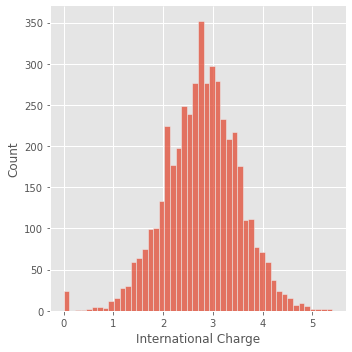

<Figure size 1224x72 with 0 Axes>

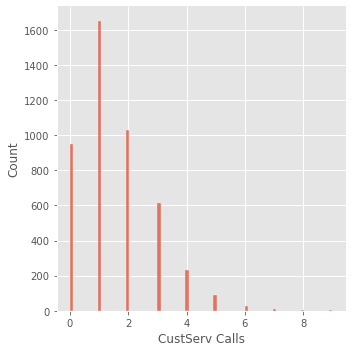

<Figure size 1224x72 with 0 Axes>

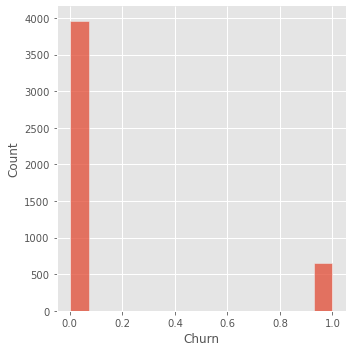

In [65]:
# distplot of all numerical columns in the dataset
for column in df1:
    plt.figure(figsize=(17,1))
    sns.displot(data=df1,x=column)
plt.show()    
    

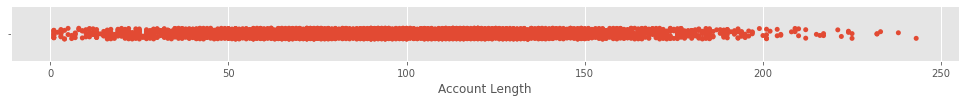

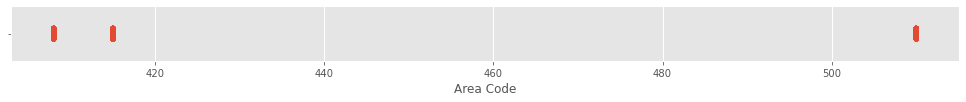

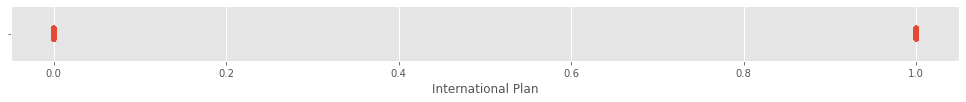

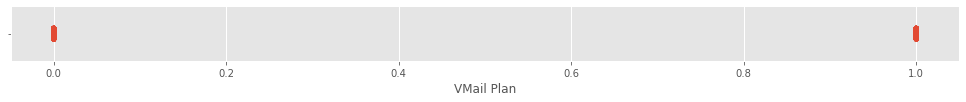

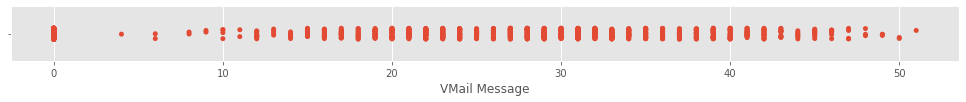

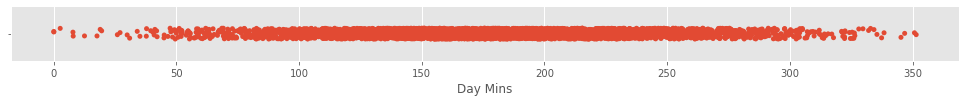

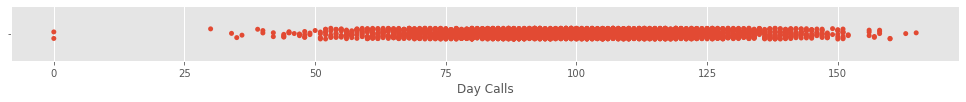

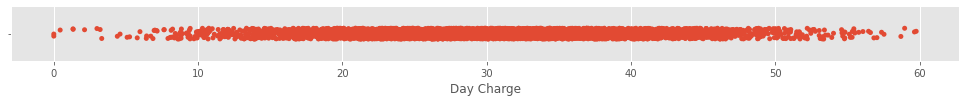

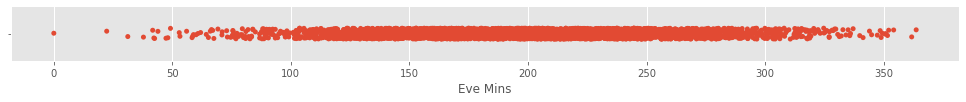

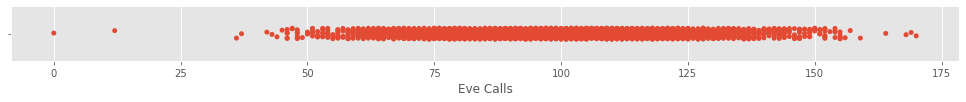

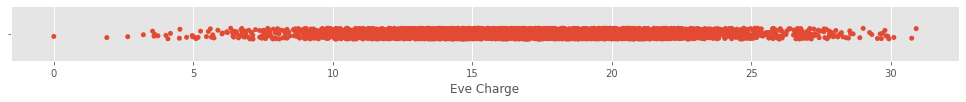

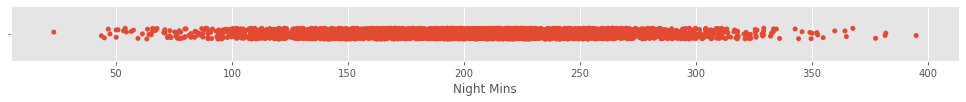

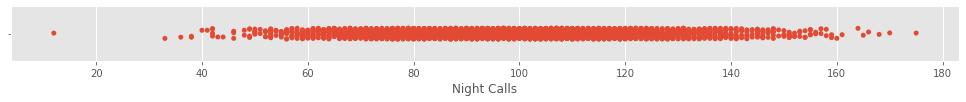

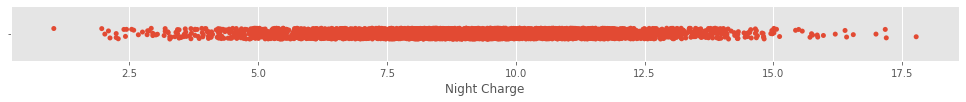

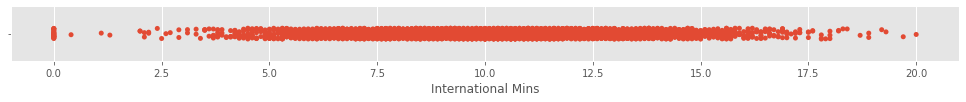

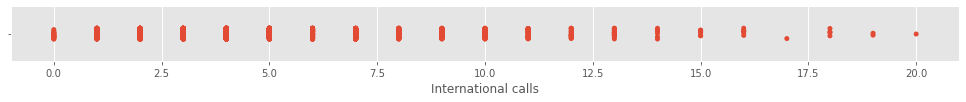

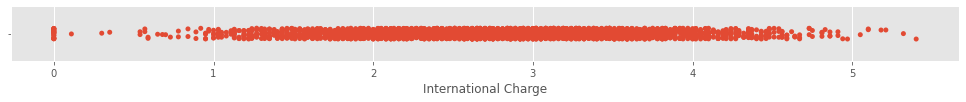

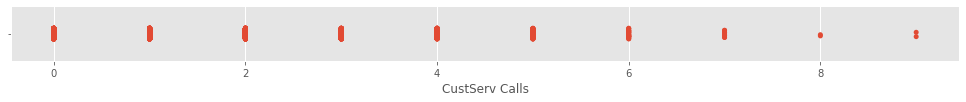

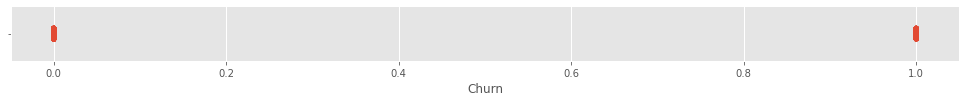

In [66]:
for column in df1:
    plt.figure(figsize=(17,1))
    sns.stripplot(data=df1,x=column)
plt.show()    

## Bivariate Analysis

#### In Bivariate analysis we are taking only two columns from the data set.for  analysing the numerical columns by imputing the boxplot and scatterplot 

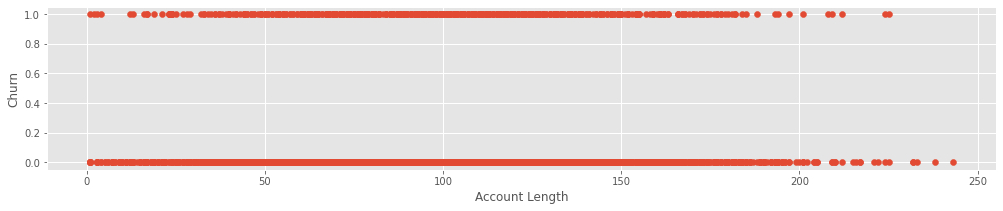

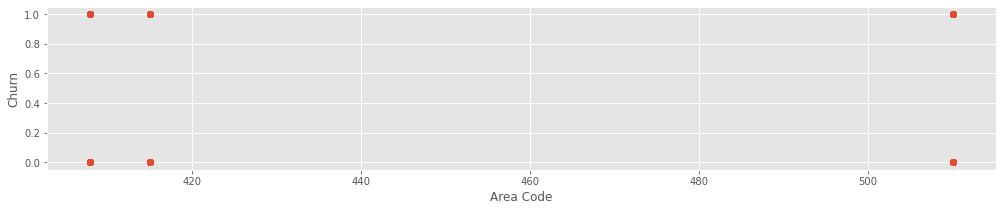

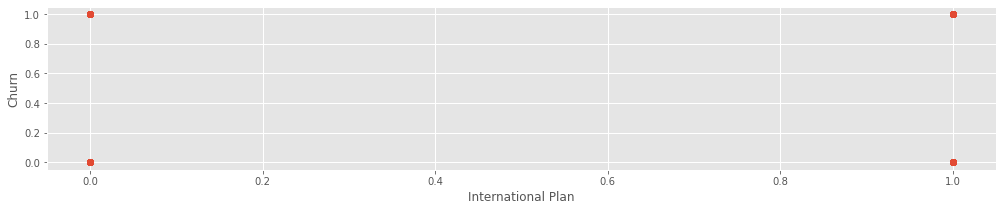

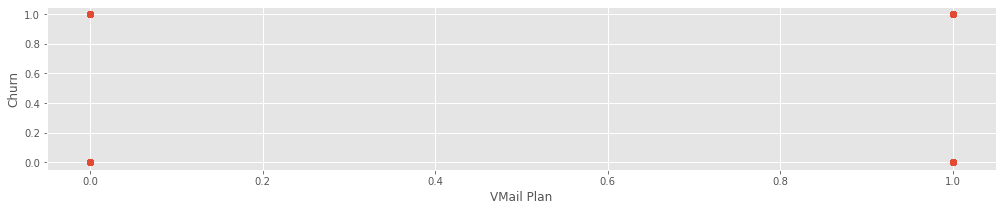

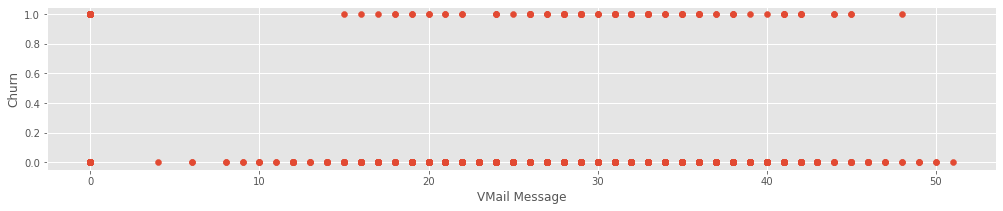

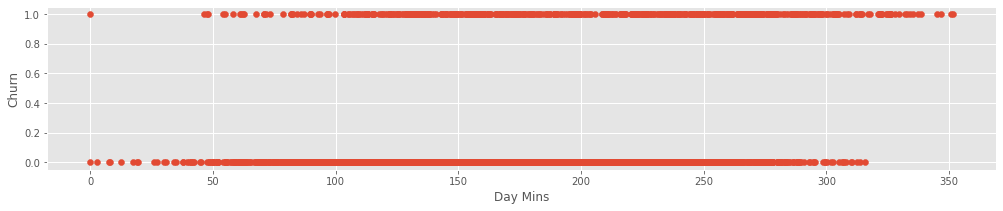

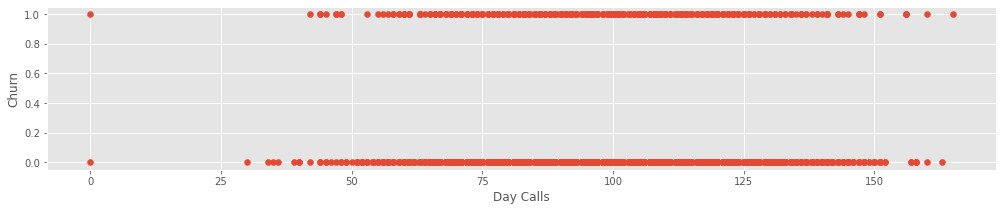

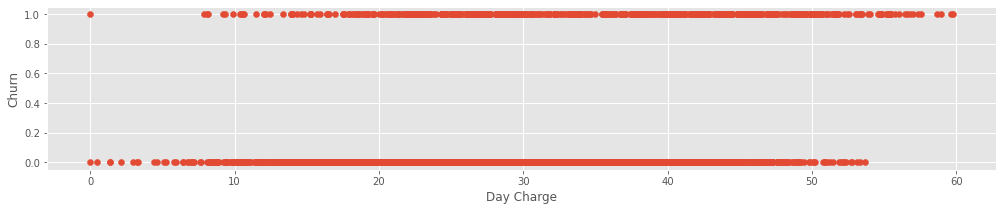

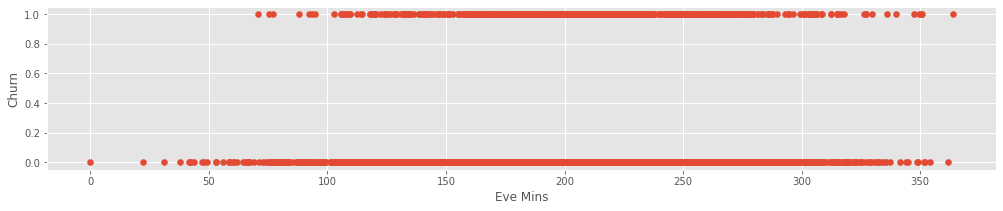

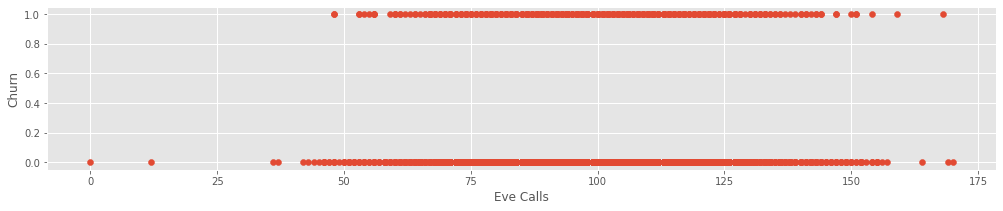

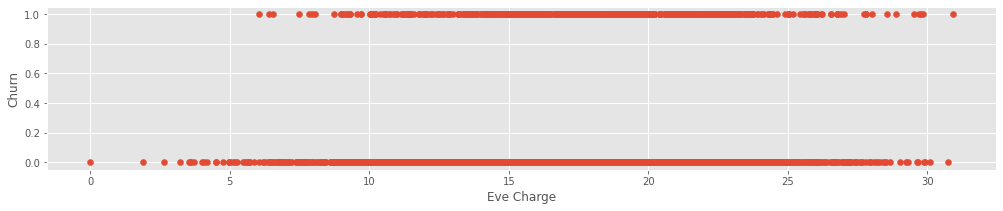

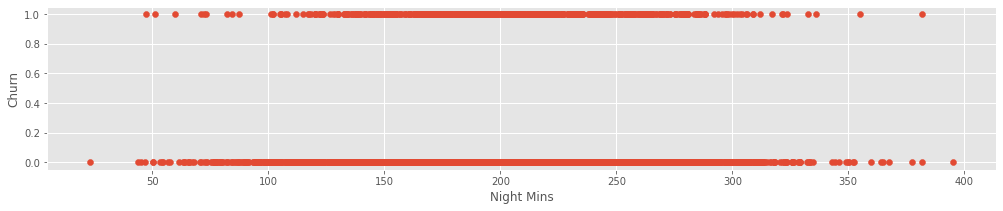

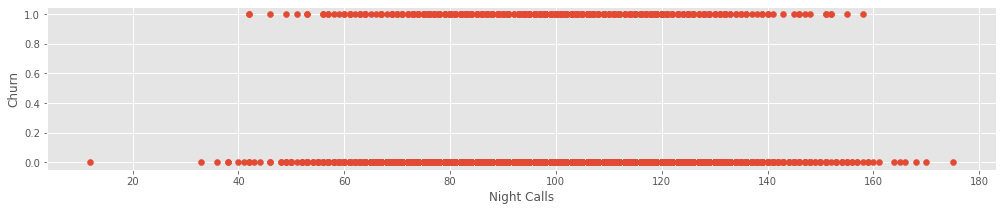

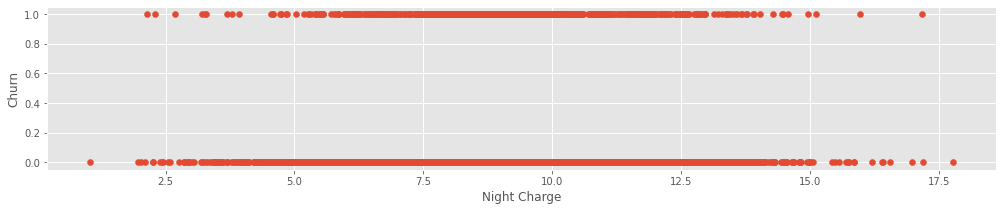

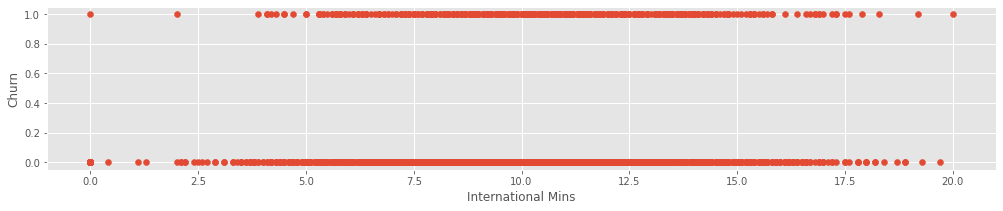

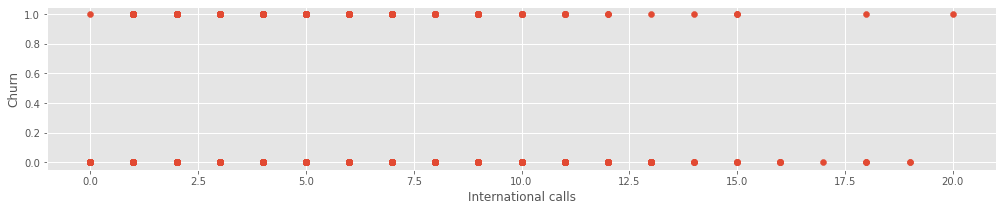

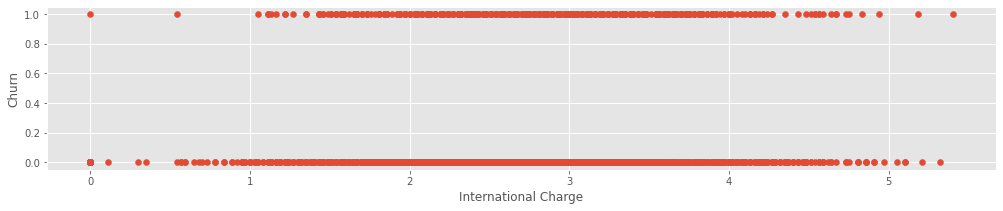

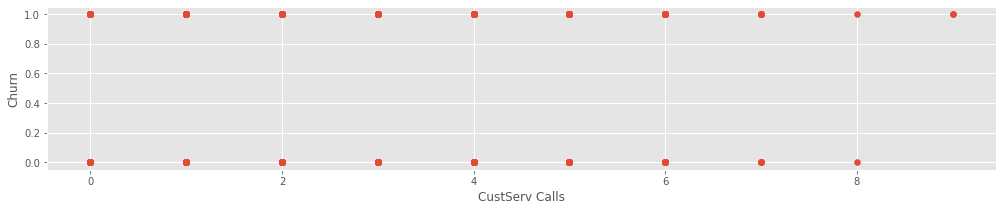

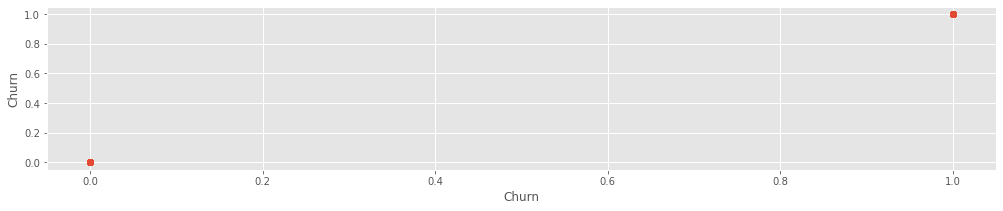

In [67]:
df2=df.describe().columns
for col in df2:
    fig=plt.figure(figsize=(17,3))
    ax=fig.gca()
    feature=df[col]
    label=df['Churn']
    correlation=feature.corr(label)
    plt.scatter(x=feature,y=label)
    plt.xlabel(col)
    plt.ylabel('Churn')
plt.show()    

In [68]:
#for col in df2:
    #fig=plt.figure(figsize=(17,3))
    #ax=fig.gca()
    #feature=df[col]
    #label=df['Churn']
    #df.boxplot(column='Churn',by=col,ax=ax)
    #plt.xlabel(col)
    #plt.ylabel('Churn')
#plt.show()    
   

###### 

## Multivariate Analysis

##### In multivariate analysis we analyse the more than two column in the dataset.We are mainly used in this analysis are heatmap,pairplot.

In [69]:
correlation=df.corr()
abs(correlation)


,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
Account Length,1.000000,0.020394,0.013948,0.004602,0.012983,0.002002,0.032783,0.001999,0.006778,0.015598,0.006775,0.002077,0.009482,0.002095,0.003483,0.023485,0.003501,0.002620,0.018046
Area Code,0.020394,1.000000,0.039263,0.003150,0.002597,0.018900,0.013179,0.018903,0.011513,0.011528,0.011533,0.002794,0.015316,0.002782,0.007292,0.011531,0.007386,0.021046,0.011995
International Plan,0.013948,0.039263,1.000000,0.009278,0.011596,0.028220,0.007477,0.028223,0.023740,0.003360,0.023740,0.025951,0.007390,0.025959,0.036973,0.006717,0.036955,0.012846,0.257524
VMail Plan,0.004602,0.003150,0.009278,1.000000,0.955280,0.004444,0.005738,0.004441,0.021775,0.005534,0.021779,0.006431,0.008468,0.006426,0.005872,0.000043,0.005912,0.014544,0.110149
VMail Message,0.012983,0.002597,0.011596,0.955280,1.000000,0.009028,0.003846,0.009025,0.017872,0.006508,0.017878,0.004672,0.000889,0.004665,0.005167,0.007423,0.005202,0.006951,0.096884
Day Mins,0.002002,0.018900,0.028220,0.004444,0.009028,1.000000,0.002823,1.000000,0.010260,0.012990,0.010268,0.009604,0.005165,0.009591,0.012314,0.000166,0.012261,0.008149,0.202439
Day Calls,0.032783,0.013179,0.007477,0.005738,0.003846,0.002823,1.000000,0.002821,0.006430,0.003923,0.006429,0.010730,0.013299,0.010724,0.012951,0.010889,0.013055,0.008747,0.016268
Day Charge,0.001999,0.018903,0.028223,0.004441,0.009025,1.000000,0.002821,1.000000,0.010255,0.012992,0.010262,0.009606,0.005164,0.009593,0.012315,0.000163,0.012262,0.008155,0.202434
Eve Mins,0.006778,0.011513,0.023740,0.021775,0.017872,0.010260,0.006430,0.010255,1.000000,0.001135,1.000000,0.018830,0.014226,0.018837,0.000165,0.005749,0.000172,0.015598,0.087042
Eve Calls,0.015598,0.011528,0.003360,0.005534,0.006508,0.012990,0.003923,0.012992,0.001135,1.000000,0.001151,0.002610,0.015463,0.002624,0.002798,0.005198,0.002831,0.007730,0.001943


<AxesSubplot:>

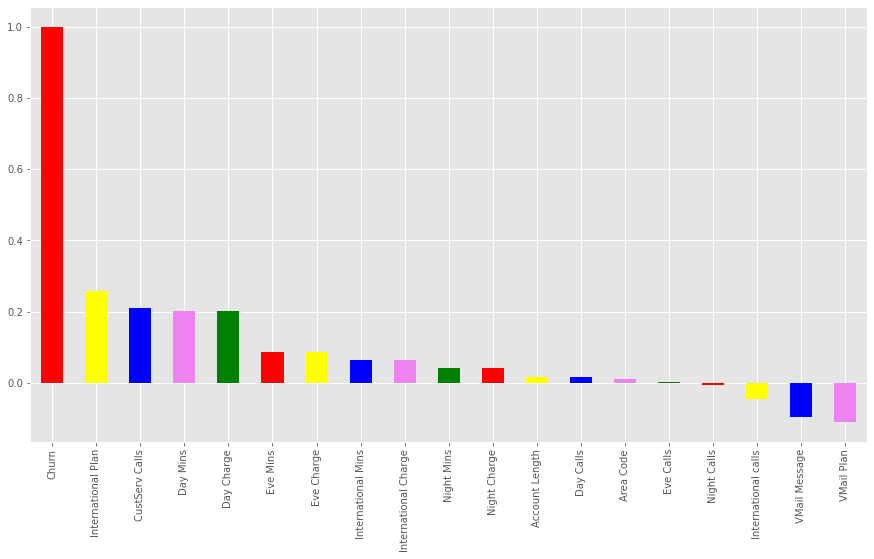

In [70]:
# Plotting the features based on correlation
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',color=['red','yellow','blue','violet','green'])

<AxesSubplot:>

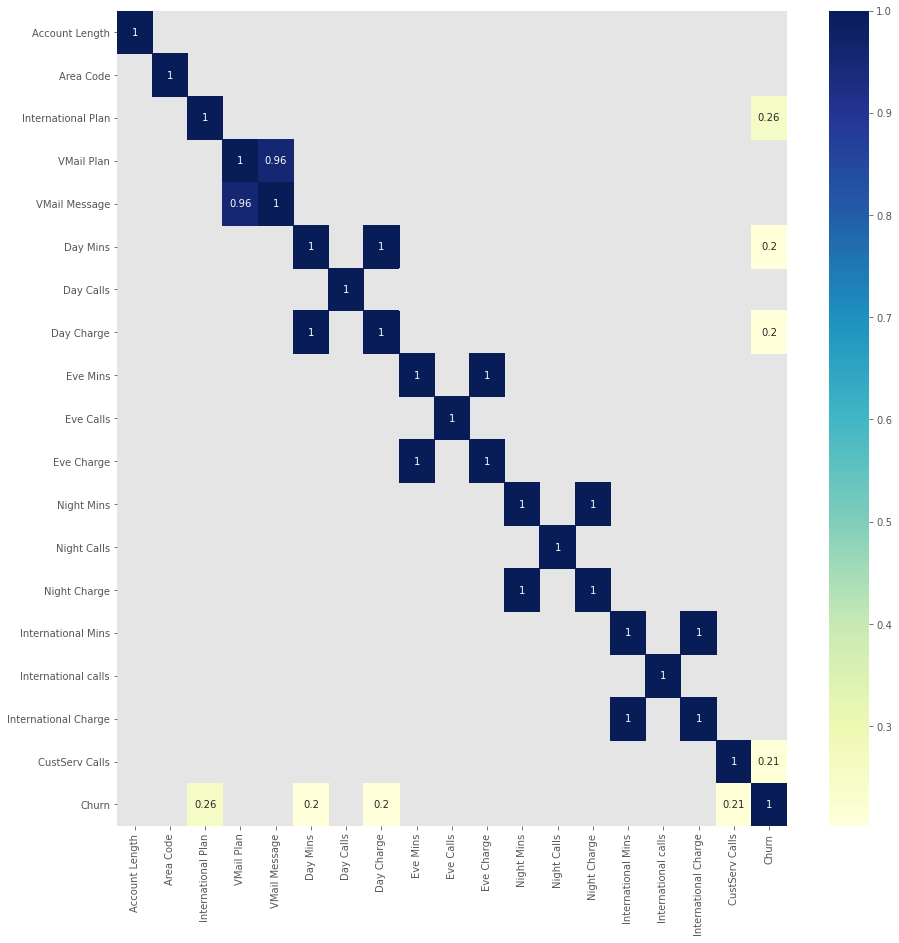

In [71]:
plt.figure(figsize=(15,15))
sns.heatmap(abs(correlation),annot=True,cmap='YlGnBu',mask=df.corr()<=0.2)

In [72]:
#sns.pairplot(df)

### Finding factors from the dataset.
1. Understanding the variables that are influencing the customers to migrate. 
2. Creating Churn risk scores that can be indicative to drive retention campaigns. 
3. Introduce new predicting  variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers. help to identify possible CHURN-FLAG YES customers and provide more attention in customer touch point areas, including customer care support, request fulfilment, auto categorizing tickets as high priority for quick resolutions any questions they may have etc.,


## Feature Engineering( Balancing the dataset)

In [73]:
df['Churn'].value_counts()

0    3961
1     656
Name: Churn, dtype: int64

* This data set having completly imbalance. So we can balanced the dataset using some techniques.

In [74]:
df.head(2)

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [75]:
df.drop(['State','Account Length','Area Code','Phone'],axis=1,inplace=True)

In [76]:
df.head(2)

,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International calls,International Charge,CustServ Calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [77]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [78]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
df_x,df_y=smote.fit_resample(x,y)

In [79]:
df_sampled=pd.concat([pd.DataFrame(df_x),pd.DataFrame(df_y)],axis=1)

In [80]:
df_sampled['Churn'].value_counts()

0    3961
1    3961
Name: Churn, dtype: int64

In [81]:
X=df_sampled.iloc[:,:-1]
Y=df_sampled.iloc[:,-1:]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=10,test_size=0.20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((6337, 16), (1585, 16), (6337, 1), (1585, 1))

## *  Model Creation

## Extra Tree Classifier

In [88]:
from sklearn.ensemble import ExtraTreesClassifier
model_E=ExtraTreesClassifier()
model_E.fit(X_train,y_train)
model_E_pred=model_E.predict(X_test)
print('Accuracy score :',accuracy_score(y_test,model_E_pred))
print('confusion matrix : \n ',confusion_matrix(y_test,model_E_pred))
print('precision :',precision_score(y_test,model_E_pred))
print('recall :',recall_score(y_test,model_E_pred))


Accuracy score : 0.9444794952681388
confusion matrix : 
  [[772  30]
 [ 58 725]]
precision : 0.9602649006622517
recall : 0.9259259259259259


In [96]:
model_E
params={
     'max_depth':[9,10,11,12,13,14,15],
      'n_estimators':[10,50,100,150,200,500,1000],
      'random_state':[0,1,3,5,20,43,23]
}

In [98]:
from sklearn.model_selection import RandomizedSearchCV
random_cv=RandomizedSearchCV(model_E,params,cv=3,verbose=2)
random_cv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ......max_depth=9, n_estimators=200, random_state=0; total time=   1.4s
[CV] END ......max_depth=9, n_estimators=200, random_state=0; total time=   1.4s
[CV] END ......max_depth=9, n_estimators=200, random_state=0; total time=   1.4s
[CV] END .....max_depth=14, n_estimators=150, random_state=1; total time=   1.5s
[CV] END .....max_depth=14, n_estimators=150, random_state=1; total time=   1.5s
[CV] END .....max_depth=14, n_estimators=150, random_state=1; total time=   1.4s
[CV] END .....max_depth=11, n_estimators=200, random_state=3; total time=   1.6s
[CV] END .....max_depth=11, n_estimators=200, random_state=3; total time=   1.6s
[CV] END .....max_depth=11, n_estimators=200, random_state=3; total time=   1.6s
[CV] END ...max_depth=15, n_estimators=1000, random_state=20; total time=  10.6s
[CV] END ...max_depth=15, n_estimators=1000, random_state=20; total time=  10.7s
[CV] END ...max_depth=15, n_estimators=1000, ran

RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(),
                   param_distributions={'max_depth': [9, 10, 11, 12, 13, 14,
                                                      15],
                                        'n_estimators': [10, 50, 100, 150, 200,
                                                         500, 1000],
                                        'random_state': [0, 1, 3, 5, 20, 43,
                                                         23]},
                   verbose=2)

In [101]:
print(random_cv.best_estimator_)
print(random_cv.best_params_)
print(random_cv.best_score_)

ExtraTreesClassifier(max_depth=15, n_estimators=1000, random_state=20)
{'random_state': 20, 'n_estimators': 1000, 'max_depth': 15}
0.8971118694039304


In [105]:
model_E=ExtraTreesClassifier(n_estimators=1000,max_depth=15,random_state=20)
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model_E,X,Y,cv=3,scoring='accuracy')
print(scores)
print('accuracy',scores.mean())
print('std',scores.std())

[0.9045816  0.90003786 0.88977273]
accuracy 0.898130729865868
std 0.00619427337092989


## Feature Selection

### 2. Recursive feature elimination method(RFE)

In [91]:
from sklearn.feature_selection import RFE
rfe=RFE(model_L,8,verbose=1)
fit=rfe.fit(X,Y)
print('num features : {}'.format(fit.n_features_))
print('support features :{}'.format(fit.support_))
print('feature ranking : {}'.format(fit.ranking_))

Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
num features : 8
support features :[ True  True  True  True False False False False False False False False
  True  True  True  True]
feature ranking : [1 1 1 1 4 6 5 3 7 8 2 9 1 1 1 1]


In [92]:
rfe_ranking=pd.DataFrame(fit.ranking_)
features=pd.DataFrame(df.columns)
select=pd.concat([rfe_ranking,features],axis=1)
columns=['Ranking','selected_rfe_features']
select.columns=columns
select.loc[select['Ranking']==1.0,:]

,Ranking,selected_rfe_features
0,1.0,International Plan
1,1.0,VMail Plan
2,1.0,VMail Message
3,1.0,Day Mins
12,1.0,International Mins
13,1.0,International calls
14,1.0,International Charge
15,1.0,CustServ Calls


#### From above observation we extract the features based on the method called Recursive feature elimination. Based on this method I have selected most important features that can be effected to the telecom churn.

## CONCLUSION

##### After performing the exploratory data analysis on data set this what we incured from the data:

###### * There are some states where the churn rate is high as compared to others may be due to low network coverage. *Area code and Account length do not play any kind of role regarding the churn rate so,it's redundant data columns *In the International plan those customers who have this plan are churn more and also the international calling charges are also high so the customer who has the plan unsatisfied with network issues and high call charge *IN the voice mail section when there are more than 20 voice-mail messages then there is a churn so it basically means that the quality of voice mail is not good. *Total day call minutes, total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, these columns didn't play any kind of role regarding the churn rate. *In international calls data shows that the churn rate of those customers is high, those who take the international plan so it means that in international call charges are high also there is a call drop or network issue. *In Customer service calls data shows us that whenever an unsatisfied customer called the service center the churn rate is high, which means the service center didn't resolve the customer issue.

### RECCOMENDATIONS

##### 1. Improve network coverage churned state
##### 2. In international plan provide some discount plan to the customer
##### 3. Improve the voice mail quality or take feedback from the customer
##### 4. Improve the service of call center and take frequently feedback from the customer regarding their issue and try to solve it    as soon as possible
##### 5. According to the dataset most effecting features to the customer churn mentioned below.
######  a. International Plan
###### b. Vmail Plan
###### c. Vmail Message
###### d. Day Mins
###### e. International Mins
###### f. International calls
###### g. International Charge
###### h. CustServ Calls

###### These are the main effecting features impact on telecom chrun. So we maintain the proper plans regarding these features.